# MNIST dataset

In [87]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])


predictions = model(x_train[:1]).numpy()
predictions

# predictions_after_softmax = tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

TensorFlow version: 2.16.1


/home/magda98/.cache/pypoetry/virtualenvs/non-package-mode-6epshtBm-py3.10/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2.214616

In [88]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10


/home/magda98/.cache/pypoetry/virtualenvs/non-package-mode-6epshtBm-py3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8549 - loss: 0.4716
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0956
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9718 - loss: 0.0888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0804
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0669
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0645
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0587
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0581
313/313 - 0s - 2ms/step - accuracy: 0.9785 - loss: 0.0830


[0.08302713930606842, 0.9785000085830688]

# Spotify dataset

In [83]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
# prepare dataset
data = pd.read_csv("spotify-2023.csv")
dataset = data[['track_name', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']]

dataset = shuffle(dataset)
dataset.reset_index(inplace=True, drop=True)
dataset

train = dataset.iloc[:851, :]
test = dataset.iloc[852:, :]

train_data = train[test.columns.drop(['track_name'])]
test_data = train[test.columns.drop(['track_name'])]

scaler = MinMaxScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
test_data = pd.DataFrame(scaler.fit_transform(train_data), columns=test_data.columns)

train_x = train_data[test.columns.drop(['track_name', 'streams'])]
train_y = train_data['streams']

test_x = test_data[test.columns.drop(['track_name', 'streams'])]
test_y = test_data['streams']


train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)

In [85]:
# plot loss function
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [streams]')
  plt.legend()
  plt.grid(True)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.7839 - val_loss: 0.6332
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5848 - val_loss: 0.5009
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4493 - val_loss: 0.3919
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3578 - val_loss: 0.3047
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2842 - val_loss: 0.2365
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2153 - val_loss: 0.1849
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1796 - val_loss: 0.1458
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1436 - val_loss: 0.1172
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1173 - val_loss: 0.0964
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0920 - val_loss: 0.0816
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - val_loss: 0.0710
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - val_loss: 0.0635


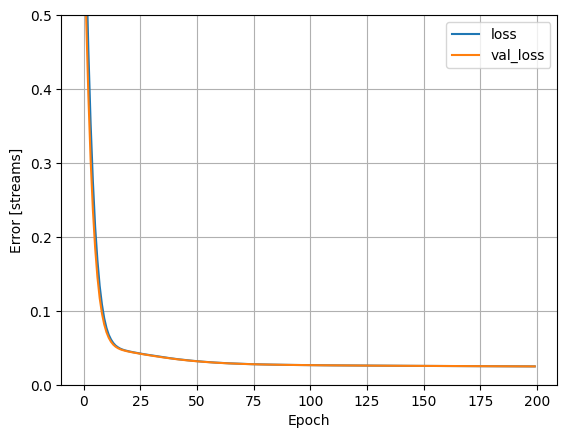

In [86]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# prepare model
model = Sequential() #here we get an insance of our model
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

history = model.fit(x= train_x, y= train_y, batch_size=128, epochs=200, validation_data=(test_x, test_y))

plot_loss(history)